In [1]:
import os

folders = [
    "csv_files",
    "outputs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)


In [2]:
import os
os.listdir("/content")


['.config',
 'csv_files',
 'historical_data.csv',
 'fear_greed_index.csv',
 'outputs',
 'sample_data']

In [3]:
import pandas as pd

trader = pd.read_csv("/content/historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index.csv")

trader.head(), sentiment.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

In [4]:
trader.info()
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           13979 non-null  object 
 1   Coin              13979 non-null  object 
 2   Execution Price   13979 non-null  float64
 3   Size Tokens       13979 non-null  float64
 4   Size USD          13979 non-null  float64
 5   Side              13979 non-null  object 
 6   Timestamp IST     13979 non-null  object 
 7   Start Position    13979 non-null  float64
 8   Direction         13979 non-null  object 
 9   Closed PnL        13979 non-null  float64
 10  Transaction Hash  13979 non-null  object 
 11  Order ID          13978 non-null  float64
 12  Crossed           13978 non-null  object 
 13  Fee               13978 non-null  float64
 14  Trade ID          13978 non-null  float64
 15  Timestamp         13978 non-null  float64
dtypes: float64(9), object(7)
memory usage: 1

In [5]:
# Convert time column
trader['time'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce')

# Extract date
trader['date'] = trader['time'].dt.date

# Convert numeric columns
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    trader[col] = pd.to_numeric(trader[col], errors='coerce')

# Drop missing important values
trader.dropna(subset=['date', 'Closed PnL'], inplace=True)

In [6]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
sentiment['classification'] = sentiment['classification'].str.strip()

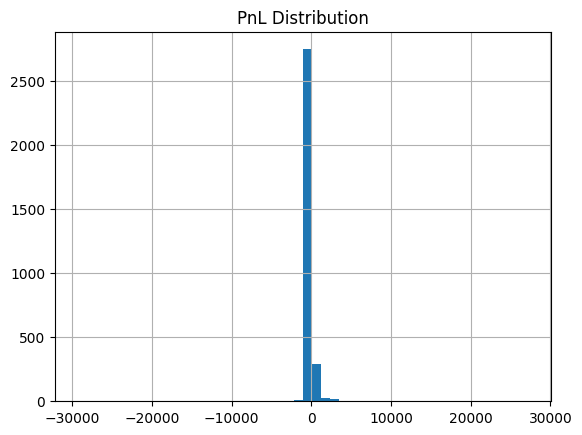

In [7]:
import matplotlib.pyplot as plt

plt.figure()
trader['Closed PnL'].hist(bins=50)
plt.title("PnL Distribution")
plt.savefig("outputs/pnl_distribution.png")
plt.show()

In [8]:
print(trader.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'time', 'date'],
      dtype='object')


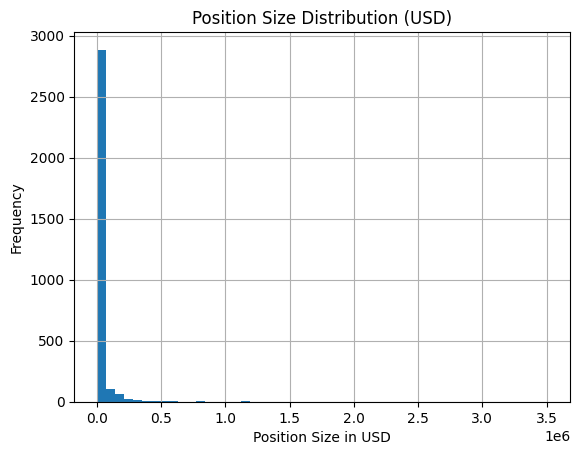

In [9]:
import matplotlib.pyplot as plt

plt.figure()
trader['Size USD'].hist(bins=50)
plt.title("Position Size Distribution (USD)")
plt.xlabel("Position Size in USD")
plt.ylabel("Frequency")
plt.savefig("outputs/position_size_distribution.png")
plt.show()

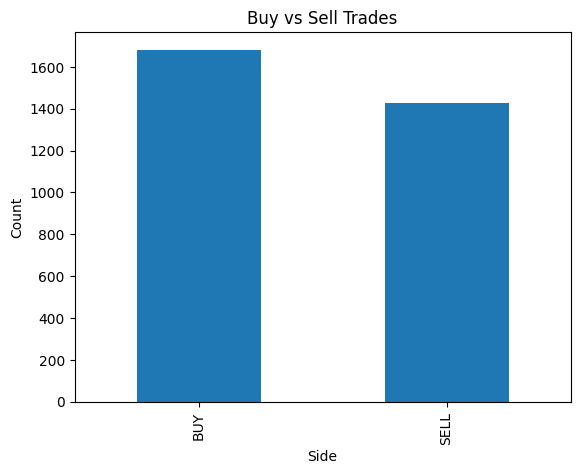

In [10]:
import matplotlib.pyplot as plt

plt.figure()
trader['Side'].value_counts().plot(kind='bar')
plt.title("Buy vs Sell Trades")
plt.xlabel("Side")
plt.ylabel("Count")
plt.savefig("outputs/buy_sell_distribution.png")
plt.show()

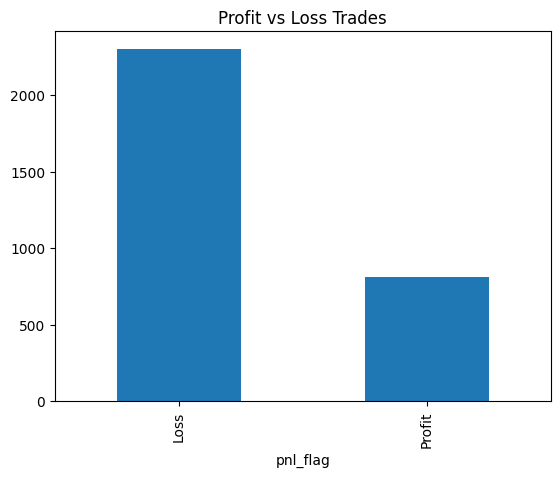

In [11]:
trader['pnl_flag'] = trader['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

trader['pnl_flag'].value_counts().plot(kind='bar')
plt.title("Profit vs Loss Trades")
plt.savefig("outputs/profit_loss_count.png")
plt.show()

In [14]:
trader.to_csv("csv_files/trader_data_cleaned.csv", index=False)

In [26]:
import pandas as pd

# Load cleaned trader data
trader = pd.read_csv("csv_files/trader_data_cleaned.csv")

# Load Fear & Greed Index
sentiment = pd.read_csv("/content/fear_greed_index.csv")

# Clean sentiment column names
sentiment.columns = sentiment.columns.str.strip().str.lower().str.replace(" ", "_")
trader.columns = trader.columns.str.strip().str.lower().str.replace(" ", "_")

In [18]:
print(trader.columns)
print(sentiment.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'time', 'date', 'pnl_flag'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [19]:
# Convert date columns to datetime.date type
trader['date'] = pd.to_datetime(trader['timestamp'], unit='ms').dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Merge
merged = trader.merge(sentiment, on='date', how='inner')

In [20]:
merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,crossed,fee,trade_id,timestamp_x,time,date,pnl_flag,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12 22:50:00,2024-10-27,Loss,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12 22:50:00,2024-10-27,Loss,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12 22:50:00,2024-10-27,Loss,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12 22:50:00,2024-10-27,Loss,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12 22:50:00,2024-10-27,Loss,1730007000,74,Greed


In [21]:
pnl_by_sentiment = merged.groupby('classification')['closed_pnl'].mean()
print(pnl_by_sentiment)

classification
Fear     92.949543
Greed    61.909802
Name: closed_pnl, dtype: float64


In [22]:
size_by_sentiment = merged.groupby('classification')['size_usd'].mean()
print(size_by_sentiment)

classification
Fear     24938.630282
Greed     3060.849379
Name: size_usd, dtype: float64


In [23]:
trade_count_by_sentiment = merged.groupby('classification').size()
print(trade_count_by_sentiment)

classification
Fear     2694
Greed     338
dtype: int64


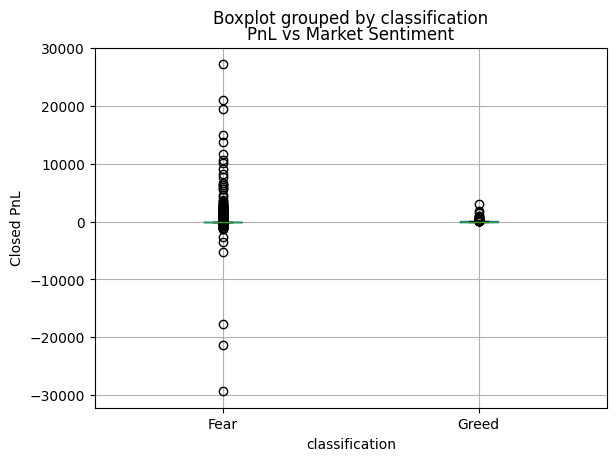

In [24]:
import matplotlib.pyplot as plt
import os

# Create the 'outputs' directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

merged.boxplot(column='closed_pnl', by='classification')
plt.title("PnL vs Market Sentiment")
plt.ylabel("Closed PnL")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

In [27]:
print(f"Trader data date range: {trader['date'].dropna().min()} to {trader['date'].dropna().max()}")
print(f"Sentiment data date range: {sentiment['date'].dropna().min()} to {sentiment['date'].dropna().max()}")

Trader data date range: 2024-02-12 to 2025-12-04
Sentiment data date range: 2018-02-01 to 2025-05-02


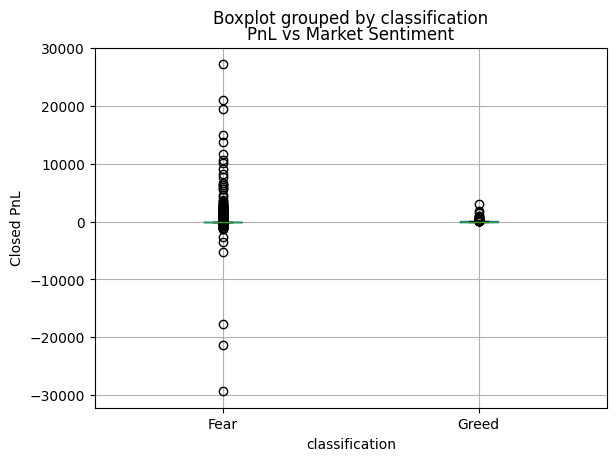

In [28]:
merged.boxplot(column='closed_pnl', by='classification')
plt.title("PnL vs Market Sentiment")
plt.ylabel("Closed PnL")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


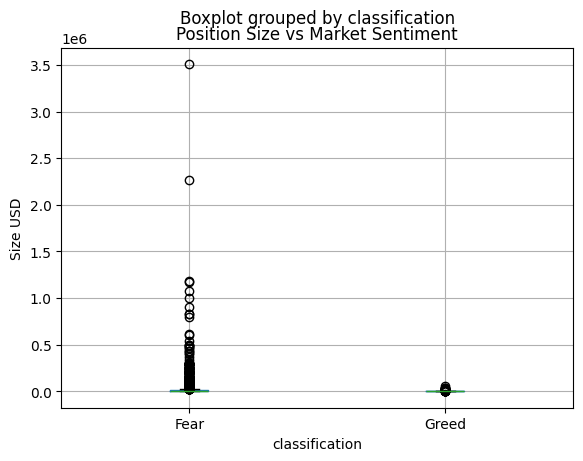

In [29]:
merged.boxplot(column='size_usd', by='classification')
plt.title("Position Size vs Market Sentiment")
plt.ylabel("Size USD")
plt.savefig("outputs/position_size_vs_sentiment.png")
plt.show()

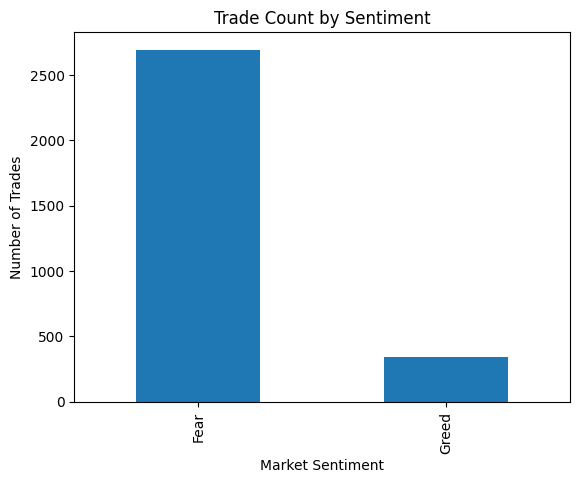

In [30]:
trade_count_by_sentiment.plot(kind='bar', title="Trade Count by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.savefig("outputs/trade_count_by_sentiment.png")
plt.show()


In [31]:
merged.to_csv("/content/sentiment_merged.csv", index=False)